In [ ]:
from IPython.html.services.config import ConfigManager
from IPython.utils.path import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'theme': 'sky',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
})

# Lecture 7. Properties of hierarchical matrices

## Previous lecture
We talked about:

- A little bit on FMM from algebra part & estimates
- Adaptive cross approximation & maxvol algorithm

## Todays lecture
- Working with H- and H-2 matrices: addition, multiplication, inversion
- Connection to sparse matrices

## H-matrix: definition

A dense matrix $A$ is called **hierarhical matrix** with respect to the cluster trees $T$ and $S$ for rows/columns, 

if 

$$A(t, s) = U(t, s) V(t, s), \quad t \in T, \quad s \in S.$$

## Properties of the H-matrix

- Storage is $\mathcal{O}(N \log N)$ 
- Complexity of matrix-by-vector product is $\mathcal{O}(N \log N)$ 
- Computation of the representation is reduced to the blockwise approximation (approximate many blocks independently via cross approximation algorithms).

## Where H-matrices come from
- Approximation of integral operators
- As inverses of sparse matrices (?)

## Model example: inverse of the tridiagonal matrix

H-matrices are connected with sparse matrices.

Sparse matrices come from the solution of PDEs.

Consider a tridiagonal matrix.

$$A = D + D_1 Z + D_2 Z^{\top},$$

where $Z$ is a **lower-shift matrix**.

Tridiagonal matrix is an H-matrix with H-ranks equal to $1$.

## Tridiagonal matrix and it LU

Tridiagonal matrix and LU.

It is well-known, that tridiagonal matrix can be factorized into a product of **lower triangular** bidiagonal matrix, and **upper triangular** bidiagonal matrix.

$$A = LU.$$

## Numerical experiment

(array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]]), array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , -0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , -0.        , -0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.5845496 ,  0.92604184,  0.7268841 , -0.83250839,  1.        ,
         0.        ,  0.        ,  0.        ],


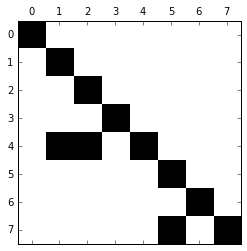

In [36]:
import numpy as np
import scipy.linalg as spla
import matplotlib.pyplot as plt
%matplotlib inline

n = 8

#d1 = np.random.randn(n)
#d2 = np.random.randn(n-1)
#d3 = np.random.randn(n-1)
#d1 = 2*np.ones(n)
d1 = np.random.randn(n)
d2 = -np.ones(n-1)
d3 = -np.ones(n-1)

A = np.diag(d1) + np.diag(d2, 1) + np.diag(d3, -1)

Q = spla.lu(A)
print Q
Q1 = Q[1]
Q1[np.abs(Q1 < 1e-15)] = 0
plt.spy(Q1)

## LU-factorization

The LU factorization has structure, what can we say about the inverse of the matrix?

We have $$ A = LU, $$

thus

$$A^{-1} = U^{-1} L^{-1}.$$

thus solving a linear system is reduced to the solution of two linear systems, one with the matrix $L$ another with the matrix $U$,

each one can be done in $\mathcal{O}(N)$ operations.

## Exact inverse for the tridiagonal matrix

The inverses $U^{-1}$ and $L^{-1}$ are (typically) dense:

## Numerical experiment

Let us do a short numerical experiment

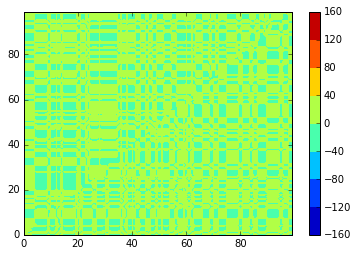

In [37]:
import numpy as np

n = 100

d1 = np.random.randn(n)
d2 = np.random.randn(n-1)
d3 = np.random.randn(n-1)

A = np.diag(d1) + np.diag(d2, 1) + np.diag(d3, -1)
iA = np.linalg.inv(A)
plt.contourf(iA)
plt.colorbar()

## The inverse is H-matrix

But the inverse of a tridiagonal matrix is an H-matrix!

In [39]:
import numpy as np

n = 100

d1 = np.random.randn(n)
d2 = np.random.randn(n-1)
d3 = np.random.randn(n-1)

A = np.diag(d1) + np.diag(d2, 1) + np.diag(d3, -1)
iA = np.linalg.inv(A)

iA01 = iA[:n/2, n/2:]
iA10 = iA[n/2:, :n/2]

np.linalg.svd(iA10)[1]

array([  1.40047671e+02,   2.26154569e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,   1.39935734e-14,   1.39935734e-14,
         1.39935734e-14,

## Tridiagonal matrix and its inverse

Let $A$ be a tridiagonal matrix of size $2n \times 2n$. Then,

$$A^{-1} = \begin{bmatrix} A_{00} & A_{01} \\
A_{10} & A_{11}  
\end{bmatrix},
$$

where $A_{ij}$ has size $n \times n$

and 

$$\mathrm{rank}~A_{01} \leq 1, \quad \mathrm{rank}~A_{10} \leq 1.$$

## How to prove it: Nullity theorem

The very nice proof can be based on so-called **nullity theorem** (for details, see [The Interplay of the ranks of the submatrices](http://www-math.mit.edu/~gs/papers/IRS.pdf) by G. Strang, T. Nguen)

**Nulllity theorem:**

Complementary submatrices of $A$ and $A^{-1}$ have the same **nullity**

Nullity is the dimension of the kernel of the matrix.

Complementary submatrix is the one that have rows not contained in the original one, and columns not contained in the original one.

## Nullity theorem: proof

Let 

$$\begin{bmatrix} A & * \\
* & * \end{bmatrix}^{-1} = \begin{bmatrix} * & * \\ * & D \end{bmatrix}, \quad \mathrm{nullity}(A) = \mathrm{nullity}(D).$$

Anny permutations of row/columns in the original matrix will put the complementary in the same place, so it is enough to prove for the left-to-corner case.



## Nullity theorem: proof(2)

Let $2 \times 2$ block matrix $T$ have block $T_{11} = A$ and its inverse have $T^{-1}_{22} = D$.

Let the columns of $N$ be the basis for the nullspace of $A$,

$$AN = 0.$$

Then, the second block row of $T^{-1} T = I$ gives

$$T^{-1}_{21} A + D T_{21} = 0.$$

If we multiply this equation by $N$ from the right we have

$$
   T^{-1}_{21} A N + DT_{21} N = D T_{21} N = 0.
$$

We only need to prove that the columns of $T_{21} N$ are linearly independent.

Suppose that $y$ is such that

$$
   T_{21} N y = 0.
$$

Then, multiplying $T$ by 
$$
\begin{bmatrix} Ny \\ 0 \end{bmatrix},
$$
we get the zero vector.

Thus, since $T$ is invertible, we get $N y = 0$, and since the columns of $N$ are linearly independent we get $y = 0$.

## Ranks of the submatrices of the inverse


Let $B$ be the **banded matrix** (tridiagonal matrix is a banded matrix with bandwidth $1$).

Then, the general theorem says:

Every submatrix $B$ above the $p$-th diagonal of the matrix $T$ has $\mathrm{rank}(B) < k$ IFF (if and only if) 

every submatrix $C$ above the $p$-th diagonal of the matrix $T^{-1}$ has $\mathrm{rank}(C) < p + k$.

## Proof

Since $TT^{-1} = I$, and look at the first $M$ rows of $T$ (with $k \leq M \leq n - p - k$).

Then,

$$\begin{bmatrix}
A & B \\
* & * 
\end{bmatrix}
\begin{bmatrix}
* & C \\
* & D
\end{bmatrix}
= \begin{bmatrix} I & 0 \\
* & * 
\end{bmatrix}.
$$

$B$ and $C$ lie above the diagonals, they are complementary, and 

$$\mathrm{nullity}(B) = \mathrm{nullity}(C). $$

Thus, 

$$n - M - p - \mathrm{rank}(B) = n - M - \mathrm{rank}(C).$$

or

$$\mathrm{rank}(C) = \mathrm{rank}(B) + p.$$

## Tridiagonal matrix as an H-matrix

The condition that all submatrices above/below subdiagonals have rank $1$ is a stricter condition, then the condition that the "big blocks" have rank-$1$. 

This leads to the so-called **quasi-separable structure** and $\mathcal{O}(N)$ direct algorithm for solving linear systems with such matrices. Unfortunately, this only a 1D-case.

The H-matrix case is more general in the sense that it can be applied to any cluster trees, any dimension of the problem (but the complexity of course grows with $N$).

## Computing the inverse of the H-matrix

What can we say about the numerical inversion of the H-matrix? 

We will illustrate everything on a 1D-H structure,

i.e. 

$$
  M = \begin{bmatrix}
 A  & B \\
  C & D
  \end{bmatrix},
$$
with off-diagonal blocks approximated with low-rank matrices.

## Block inversion and Schur complement

The most straightforward algorithm is to use **block inversion** formula.

Let us derive it.

Let 

$$
  M = \begin{bmatrix}
  A & B \\
  C & D
  \end{bmatrix},
$$

Then

$$M^{-1} = \begin{bmatrix}
(A - B D^{-1} C)^{-1} & -A^{-1} B (D - C A^{-1} B)^{-1} \\
-D^{-1} C ( A - B D^{-1} C)^{-1} & (D - CA^{-1} B)^{-1}
\end{bmatrix}
$$

Let us prove it on the whiteboard.

## How we use this formula?

$$M^{-1} = \begin{bmatrix}
(A - B D^{-1} C)^{-1} & -A^{-1} B (D - C A^{-1} B)^{-1} \\
-D^{-1} C ( A - B D^{-1} C)^{-1} & (D - CA^{-1} B)^{-1}
\end{bmatrix}
$$


The usage of this formula is quite simple.

Let $B$ and $D$ be of small rank.

Then, the offdiagonal blocks are of low-rank.

The crucial things are the inverses of the matrices

$$S_A = (A - B D^{-1} C), \quad (S_D = D - CA^{-1} B).$$

## Recursion
The crucial things are the inverses of the matrices

$$S_A = (A - B D^{-1} C), \quad (S_D = D - CA^{-1} B).$$

The **recursion assumption** is that both $A^{-1}$ and $D^{-1}$ are available already and are stored in the $H$-matrix format.

Then, the matrices $S_A$ and $S_D$ are low-rank modifications of the matrices $A$ and $D$,

The matrices $B D^{-1} C$ and $CA^{-1} B$ are low-rank matrices, and factors can be computed by calling **matvec procedure**

The inverses of $S_A$ and $S_D$ will be low-rank modifications of $A^{-1}$ and $D^{-1}$ (from the **Woodbury formula**) and the cost will be again $\mathcal{O}(r)$ matrix-by-vector products.

The H-ranks will be bounded by $2r$.

## Hierarhical inversion

The whole concept of the hierarhical inversion is that we work with diagonal blocks recursively, and use H-matrix representation for matrix-by-matrix products, matrix-by-vector products, etc.

## Necessary operations during the inversions

In 1D case we only need to multiply H-matrices by vectors, add low-rank matrices.

In the general case, we will also need to **multiply H-matrices**, which will be the most time-consuming operation, since it has to be done recursively as well.

## Addition of H-matrices

Adding H-matrices and adding low-rank matrices to the H-matrix is easy: 

it is reduced to the addition of low-rank matrices.

## Adding low-rank matrices 

Given a low-rank matrix $A$ and a low-rank matrix $B$ both with rank $r$, 

i.e.

$$A = U_1 V^{\top}_1, \quad B = U_2 V^{\top}_2,$$

the result has rank not higher that $2r$, moreover

$$A + B = \begin{bmatrix} U_1 & U_2 \end{bmatrix} \begin{bmatrix} V_1 & V_2 \end{bmatrix}^{\top}, $$

i.e. you just concatenate factors.

The problem is that the rank will grow during the operations, thus we have to **approximate it back**.

## Compressing (rounding) low-rank matrices


Given $$A = U V^{\top},$$

with $U \in \mathbb{R}^{N \times R},$

$R > r$, how we can efficiently compute $r$ and SVD of $A$ ?

Directly computing the SVD is **not possible** due to the $\mathcal{O}(N^3)$ complexity.

we can use **cross approximation**, but here we have a much better algorithm, that is guaranteed to compute the solution in $\mathcal{O}(N)$ time.

## Recalling QR decomposition

Recalling NLA: we can orthogonalize using QR-decomposition!

Thus, we have

$$U = Q_u R_u, \quad V = Q_v R_v,$$

$$A = UV^{\top} = Q_u R_u R^{\top}_v Q^{\top}_v = Q_u S Q^{\top}_v.$$

The matrix $S = R_u R^{\top}_v$ is small, and it can be factorized by the "true" SVD, and rank-$r$ approximation can be computed:

$$S \approx \widehat{U} \Sigma \widehat{V}^{\top},$$

and 

$$A = (Q_u \widehat{U}) \Sigma (Q_v \widehat{V})^{\top}.$$

## Complexity analysis of the QR/rounding scheme

The complexity analysis is very simple: two QR-factorizations ($\mathcal{O}(NR^2)$ each) and one SVD of an $R \times R$ matrix ($\mathcal{O}(R^3)$). This is tractable for very large $N, R$.

## Multiplication of two H-matrices

Another important operation required in the inversion process is the matrix-by-matrix multiplication, where both matrices are given in the H-matrix format.

This is also done recursively, and two basic operations are there: 

- H-matrix by H-matrix (treat recursively)
- H-matrix by low-rank matrix, 
 This is reduced to $$H UV^{\top} = (HU) V^{\top},$$
 i.e. we have to compute $r$ matrix-by-vector products
- Adding the matrices (see above)
- Rounding with certain threshold

The total complexity is $\mathcal{O}(N)$, although the constant can be large.

## Multiplication of two H-matrices

If we multiply two H-matrices with compatible mosaic partitioning, the result will have ranks not higher that the sum of the ranks.

Can you prove that? (at least, in 1D).

## Dense H-matrix by low-rank matrix product

If $A$ is an $H$-matrix, the matrix-by-vector product is done via "Barnes-Hut type" algorith. We multiply all low-rank blocks by corresponding parts of the vector and add the result.

## Algorithm summary

The final inversion algorithm is a (nested recursion):

- We apply block inversion formula, 
- Given factorization of the big blocks, we multiply H-matrices by vectors, or H-matrices by H-matrices (here is the nested recursion).

## Factorizing H-matrices

We can also try to factorize H-matrices into the product of lower-triangular and upper-triangular matrices,

and use this as a representation.

This is actually an active research topic.

## Block LU factorizations

Instead of inversion, one can use block LU factorization, and try to approximate the factors in the H-matrix format.

$$ \begin{bmatrix} A & B \\
C & D \end{bmatrix} = \begin{bmatrix} I & 0 \\
CA^{-1} & I \end{bmatrix} \begin{bmatrix} A & 0 \\
0 & D - CA^{-1} B \end{bmatrix} \begin{bmatrix} I & A^{-1} B \\
0 & I \end{bmatrix}.$$



## What are the problems 

Once H-matrices were introduced as a concept by Hackbusch & Khoromskij in 1999,

there was a great excitement that it would be a **universal tool** for approximating matrix factorizations/inverse of sparse matrices.

However, there are problems.

- Big ranks
- High memory
- Complexity is asymptotically ok, but in practice it looses to fast direct solvers even in 2D.

Recently, the interest came back, and there are quite a few new results that make such type of solvers competible (including our group).

## What are the alternatives for sparse matrices

- Incomplete LU factorizations
- Algebraic/geometric multigrid methods
- Domain decompositions
- (Mixed) fast direct solvers.

## Note on H2-matrices

Direct analogue of FMM, storing only the **transfer matrices** between blocks.

The computations are more involved, but if the library for fast linear algebra is implemented, it is not that difficult (and reduced to tree traversal).

## Summary
- We talked about linear algebra in the H-matrix format
- We used nullity theorem to show how it works for the simplest "sparse matrix" format. That is our bridge to the sparse matrices
 

## Next lecture
- We will actually start the FastPDE course!

In [23]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()